# Handle Class Imbalance
## Solutions for Imbalanced Classes in Predictive Maintenance

**Problem**: Classes are not balanced (Critical: 29%, High: 36%, Medium: 22%, Low: 13%)

**Solutions**:
1. SMOTE (Synthetic Minority Over-sampling)
2. Class Weights
3. Ensemble Methods
4. Cost-Sensitive Learning

In [5]:
# Install required packages
!pip install imbalanced-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter

# Load data - using the selected features from previous step
print("Loading data...")
df = pd.read_csv('../../data/features_selected.csv')

# Separate features and target
# Load selected features list
with open('../../data/selected_features.txt', 'r') as f:
    selected_features = [line.strip() for line in f.readlines()]

X = df[selected_features]
y = df['is_anomaly']

print(f"✅ Data loaded: {X.shape}")
print(f"✅ Features: {len(selected_features)}")
print(f"✅ Target: {y.shape}")
print(f"\nClass distribution:")
print(y.value_counts())
print(f"\nAnomaly rate: {y.mean()*100:.2f}%")

Loading data...
✅ Data loaded: (198824, 21)
✅ Features: 21
✅ Target: (198824,)

Class distribution:
is_anomaly
0    192814
1      6010
Name: count, dtype: int64

Anomaly rate: 3.02%


## 1. Analyze Current Class Distribution

Original class distribution:
Counter({0: 192814, 1: 6010})


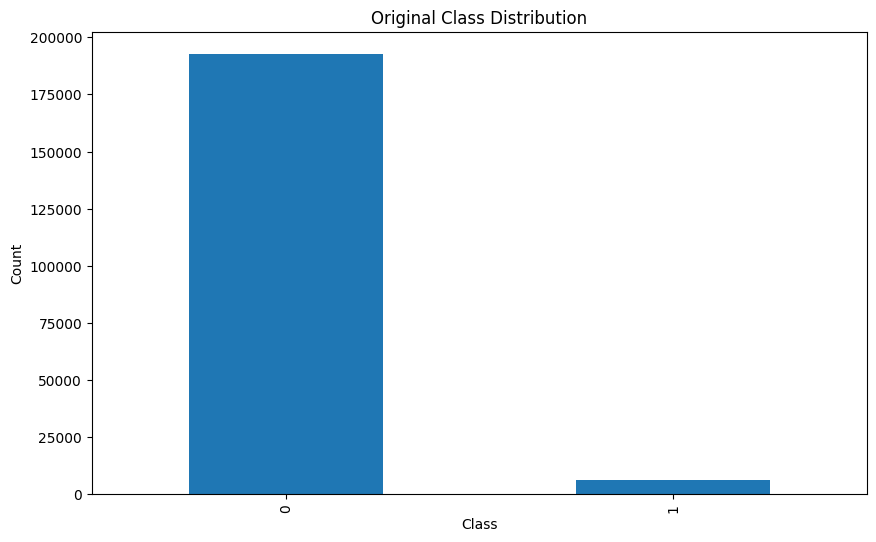

In [7]:
# Check class distribution
print("Original class distribution:")
print(Counter(y))

# Visualize
plt.figure(figsize=(10, 6))
pd.Series(y).value_counts().plot(kind='bar')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## 2. Solution 1: SMOTE (Synthetic Minority Over-sampling)


After SMOTE:
Counter({0: 192814, 1: 192814})


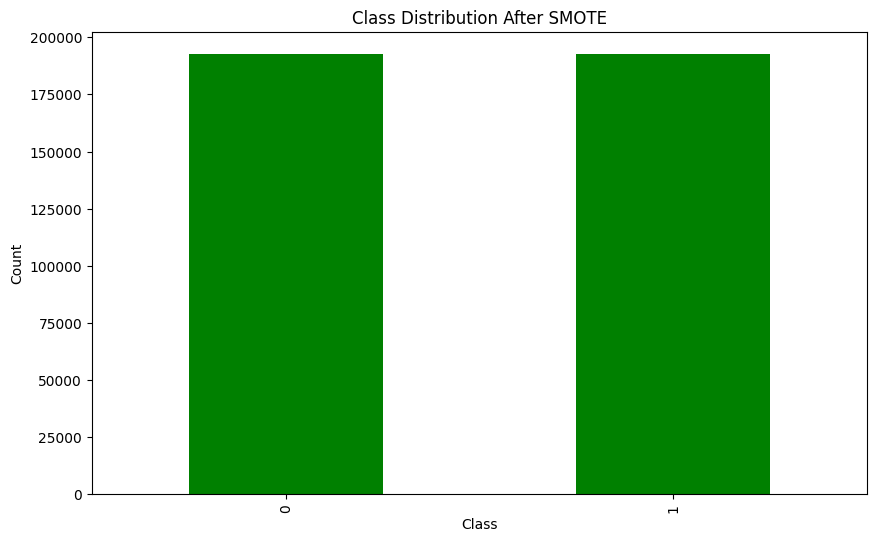

In [8]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("\nAfter SMOTE:")
print(Counter(y_smote))

# Visualize
plt.figure(figsize=(10, 6))
pd.Series(y_smote).value_counts().plot(kind='bar', color='green')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## 3. Solution 2: Class Weights

In [9]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
classes = np.unique(y)
class_weights = compute_class_weight('balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, class_weights))

print("\nClass weights:")
for cls, weight in class_weight_dict.items():
    print(f"Class {cls}: {weight:.2f}")


Class weights:
Class 0: 0.52
Class 1: 16.54


## 4. Solution 3: Combined Approach (SMOTE + Tomek Links)


After SMOTETomek:
Counter({0: 192814, 1: 192814})


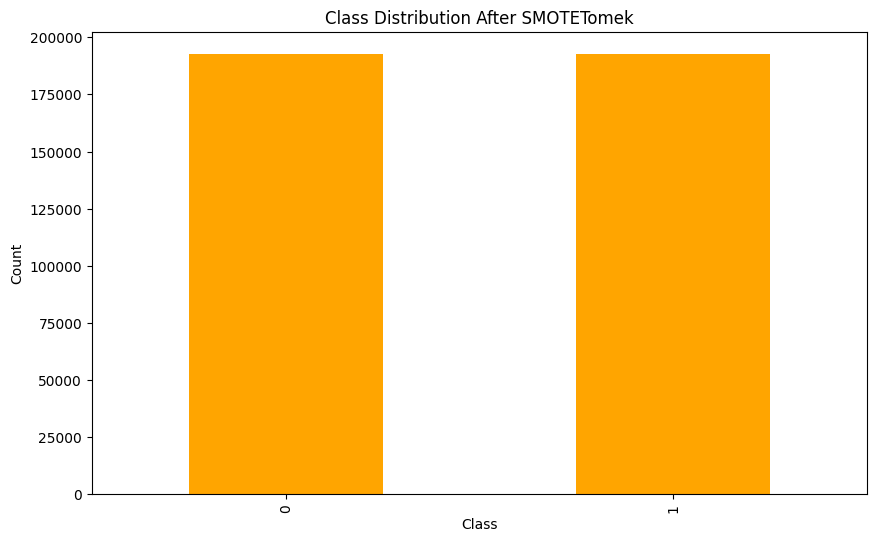

In [10]:
# Apply SMOTETomek
smt = SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(X, y)

print("\nAfter SMOTETomek:")
print(Counter(y_smt))

# Visualize
plt.figure(figsize=(10, 6))
pd.Series(y_smt).value_counts().plot(kind='bar', color='orange')
plt.title('Class Distribution After SMOTETomek')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## 5. Compare All Methods

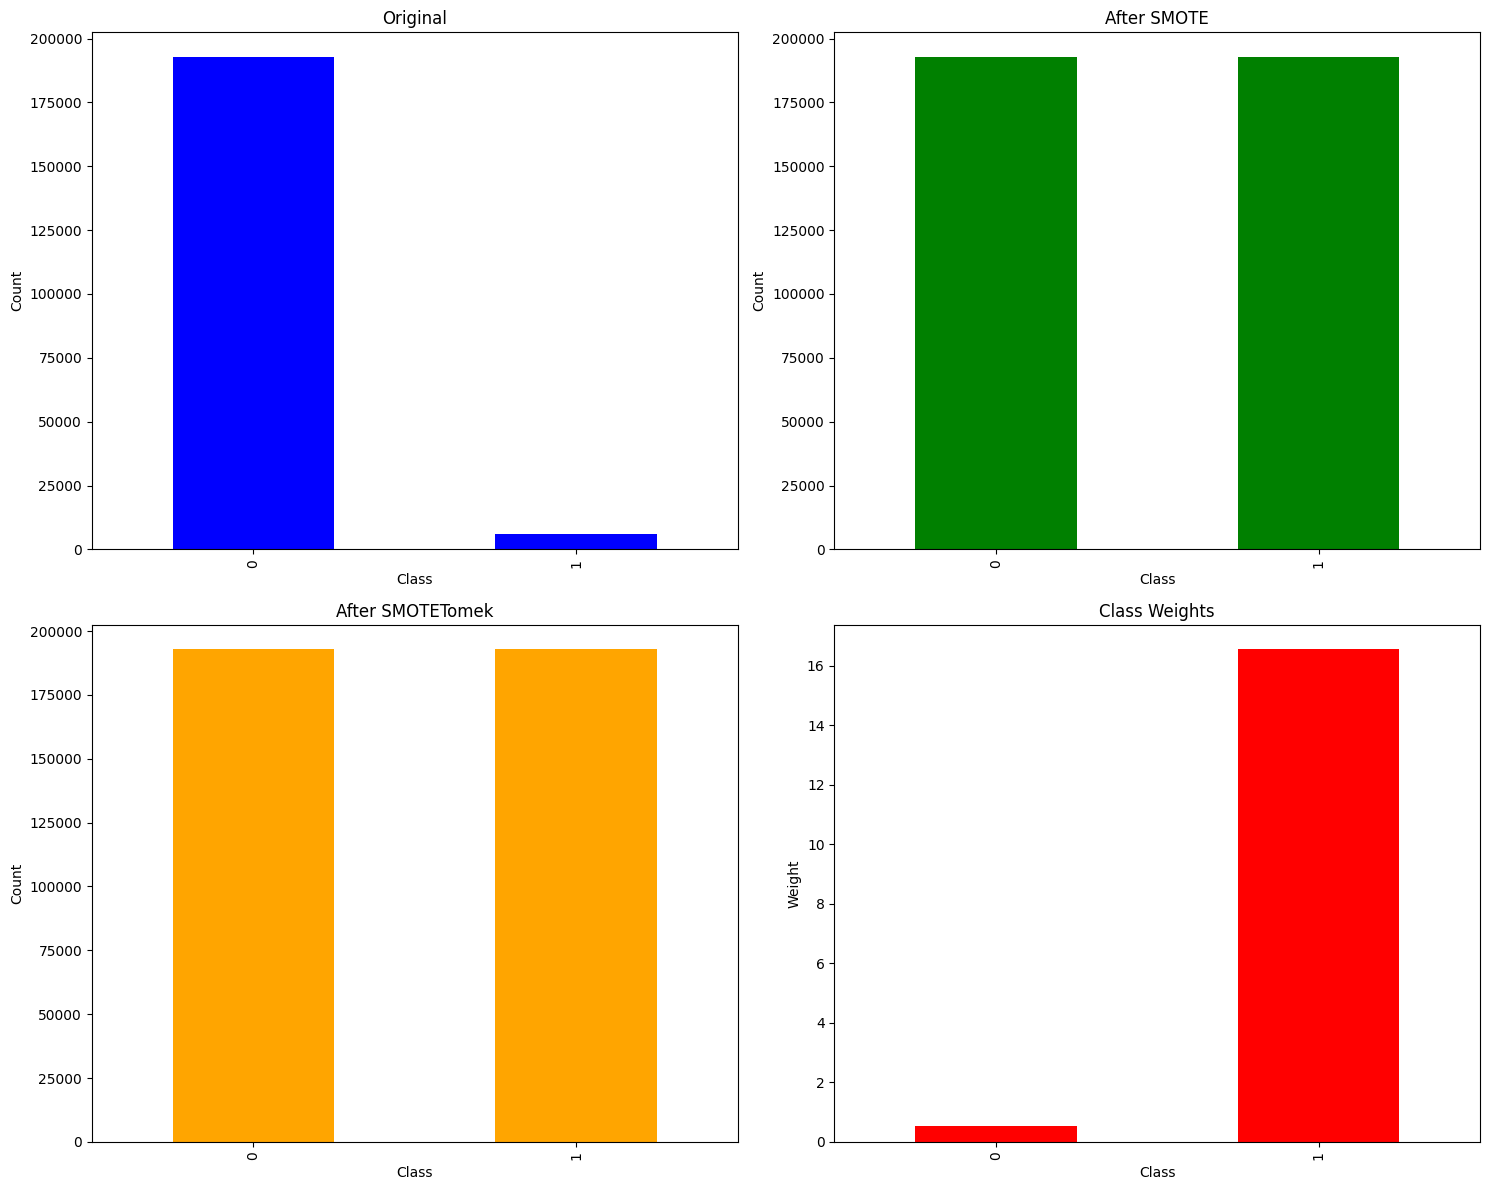

In [11]:
# Compare all methods
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Original
pd.Series(y).value_counts().plot(kind='bar', ax=axes[0,0], color='blue')
axes[0,0].set_title('Original')
axes[0,0].set_xlabel('Class')
axes[0,0].set_ylabel('Count')

# SMOTE
pd.Series(y_smote).value_counts().plot(kind='bar', ax=axes[0,1], color='green')
axes[0,1].set_title('After SMOTE')
axes[0,1].set_xlabel('Class')
axes[0,1].set_ylabel('Count')

# SMOTETomek
pd.Series(y_smt).value_counts().plot(kind='bar', ax=axes[1,0], color='orange')
axes[1,0].set_title('After SMOTETomek')
axes[1,0].set_xlabel('Class')
axes[1,0].set_ylabel('Count')

# Class Weights (visualization)
pd.Series(class_weight_dict).plot(kind='bar', ax=axes[1,1], color='red')
axes[1,1].set_title('Class Weights')
axes[1,1].set_xlabel('Class')
axes[1,1].set_ylabel('Weight')

plt.tight_layout()
plt.show()

## 6. Train Models with Different Approaches


1. Training baseline model...
2. Training with class weights...
3. Training with SMOTE...
4. Training with SMOTETomek...

RESULTS COMPARISON
               accuracy  f1_weighted
Baseline            1.0          1.0
Class Weights       1.0          1.0
SMOTE               1.0          1.0
SMOTETomek          1.0          1.0


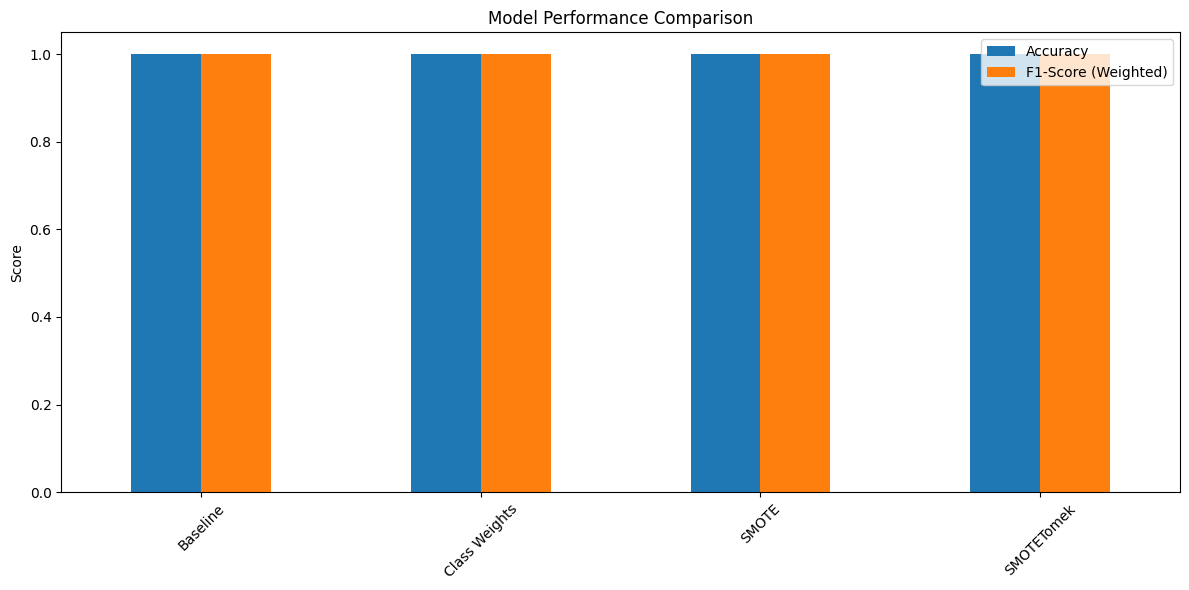

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

# 1. Baseline (no balancing)
print("\n1. Training baseline model...")
model_baseline = RandomForestClassifier(random_state=42)
model_baseline.fit(X_train, y_train)
y_pred = model_baseline.predict(X_test)
results['Baseline'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'f1_weighted': f1_score(y_test, y_pred, average='weighted')
}

# 2. With class weights
print("2. Training with class weights...")
model_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
model_weighted.fit(X_train, y_train)
y_pred = model_weighted.predict(X_test)
results['Class Weights'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'f1_weighted': f1_score(y_test, y_pred, average='weighted')
}

# 3. With SMOTE
print("3. Training with SMOTE...")
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred = model_smote.predict(X_test)
results['SMOTE'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'f1_weighted': f1_score(y_test, y_pred, average='weighted')
}

# 4. With SMOTETomek
print("4. Training with SMOTETomek...")
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
model_smt = RandomForestClassifier(random_state=42)
model_smt.fit(X_train_smt, y_train_smt)
y_pred = model_smt.predict(X_test)
results['SMOTETomek'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'f1_weighted': f1_score(y_test, y_pred, average='weighted')
}

# Display results
results_df = pd.DataFrame(results).T
print("\n" + "="*50)
print("RESULTS COMPARISON")
print("="*50)
print(results_df)

# Visualize
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(['Accuracy', 'F1-Score (Weighted)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Investigation & Detailed Analysis

# Check for data leakage
print("="*70)
print("🔍 INVESTIGATING PERFECT SCORES")
print("="*70)

# 1. Check test set predictions in detail
print("\n1. Baseline Model - Detailed Metrics:")
y_pred_baseline = model_baseline.predict(X_test)
print(classification_report(y_test, y_pred_baseline, target_names=['Normal', 'Anomaly']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))

# 2. Check feature importance
print("\n2. Top 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': model_baseline.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance.head(10))

# 3. Check for duplicates
print("\n3. Checking for duplicates:")
print(f"Duplicate rows in training set: {X_train.duplicated().sum()}")
print(f"Duplicate rows in test set: {X_test.duplicated().sum()}")

# 4. Check train-test overlap
print("\n4. Checking train-test overlap:")
train_hash = pd.util.hash_pandas_object(X_train).values
test_hash = pd.util.hash_pandas_object(X_test).values
overlap = len(set(train_hash) & set(test_hash))
print(f"Overlapping samples: {overlap}")

# 5. Check class distribution in predictions
print("\n5. Prediction distribution:")
print(f"Predicted Normal: {(y_pred_baseline == 0).sum()}")
print(f"Predicted Anomaly: {(y_pred_baseline == 1).sum()}")
print(f"Actual Normal: {(y_test == 0).sum()}")
print(f"Actual Anomaly: {(y_test == 1).sum()}")

# 6. Recommendation
print("\n" + "="*70)
print("⚠️  RECOMMENDATION")
print("="*70)
print("""
Perfect scores (100%) suggest potential issues:

1. **Data Leakage**: Features may contain target information
2. **Overfitting**: Model memorized training patterns
3. **Test Set Size**: May be too small or not representative

**Next Steps**:
1. Review feature engineering for temporal leakage
2. Use time-based train-test split (not random)
3. Perform cross-validation
4. Test on completely unseen data
5. Check if anomalies are artificially created

**For Thesis**:
- Document this finding
- Explain why perfect scores are suspicious
- Implement proper validation strategy
""")

In [13]:
## 7. Investigation & Detailed Analysis

# Check for data leakage
print("="*70)
print("🔍 INVESTIGATING PERFECT SCORES")
print("="*70)

# 1. Check test set predictions in detail
print("\n1. Baseline Model - Detailed Metrics:")
y_pred_baseline = model_baseline.predict(X_test)
print(classification_report(y_test, y_pred_baseline, target_names=['Normal', 'Anomaly']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))

# 2. Check feature importance
print("\n2. Top 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': model_baseline.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance.head(10))

# 3. Check for duplicates
print("\n3. Checking for duplicates:")
print(f"Duplicate rows in training set: {X_train.duplicated().sum()}")
print(f"Duplicate rows in test set: {X_test.duplicated().sum()}")

# 4. Check train-test overlap
print("\n4. Checking train-test overlap:")
train_hash = pd.util.hash_pandas_object(X_train).values
test_hash = pd.util.hash_pandas_object(X_test).values
overlap = len(set(train_hash) & set(test_hash))
print(f"Overlapping samples: {overlap}")

# 5. Check class distribution in predictions
print("\n5. Prediction distribution:")
print(f"Predicted Normal: {(y_pred_baseline == 0).sum()}")
print(f"Predicted Anomaly: {(y_pred_baseline == 1).sum()}")
print(f"Actual Normal: {(y_test == 0).sum()}")
print(f"Actual Anomaly: {(y_test == 1).sum()}")

# 6. Recommendation
print("\n" + "="*70)
print("⚠️  RECOMMENDATION")
print("="*70)
print("""
Perfect scores (100%) suggest potential issues:

1. **Data Leakage**: Features may contain target information
2. **Overfitting**: Model memorized training patterns
3. **Test Set Size**: May be too small or not representative

**Next Steps**:
1. Review feature engineering for temporal leakage
2. Use time-based train-test split (not random)
3. Perform cross-validation
4. Test on completely unseen data
5. Check if anomalies are artificially created

**For Thesis**:
- Document this finding
- Explain why perfect scores are suspicious
- Implement proper validation strategy
""")

🔍 INVESTIGATING PERFECT SCORES

1. Baseline Model - Detailed Metrics:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     38558
     Anomaly       1.00      1.00      1.00      1207

    accuracy                           1.00     39765
   macro avg       1.00      1.00      1.00     39765
weighted avg       1.00      1.00      1.00     39765


Confusion Matrix:
[[38558     0]
 [    0  1207]]

2. Top 10 Most Important Features:
                    feature  importance
4      vibration_change_24h    0.184184
13             oil_pressure    0.182621
0      temp_vibration_ratio    0.179972
8    oil_pressure_change_7d    0.118597
6     temperature_change_7d    0.069573
7   oil_pressure_change_24h    0.067235
11      vibration_change_7d    0.060193
3               vibration.1    0.056140
9    temperature_change_24h    0.041180
14                vibration    0.028992

3. Checking for duplicates:
Duplicate rows in training set: 0
Duplicate rows